In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Get Iris dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Convert species names into numeric classes
target = OneHotEncoder(sparse=False).fit_transform(iris.iloc[:, 4].values.reshape(-1,1))

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.iloc[:, 0:4].values, target, train_size=0.8, test_size=0.2)

In [13]:
# Single layer NN
model = Sequential()
# Hidden Layer
model.add(Dense(3, input_shape=(4,), activation='relu', name='l1'))
# Output layer
model.add(Dense(3, activation='softmax', name='l2'))

model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train the model
model.fit(X_train, Y_train, verbose=0, batch_size=2, epochs=100)

# Test the model
print("Test Accuracy:", model.evaluate(X_test, Y_test)[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 3)                 15        
_________________________________________________________________
l2 (Dense)                   (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 99ms/step - loss: 0.1223 - accuracy: 0.9333
Test Accuracy: 0.9333333373069763


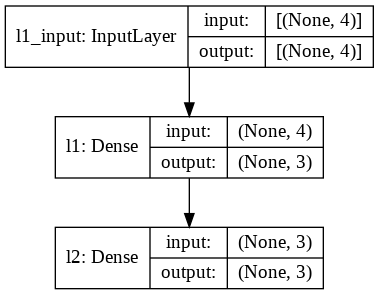

In [14]:
import keras
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------        15    55.6%
                relu   #####           3
               Dense   XXXXX -------------------        12    44.4%
             softmax   #####           3


In [4]:
# Model-2 NN with two hidden layers
model = Sequential()
# First Hidden Layer
model.add(Dense(9, input_shape=(4,), activation='relu', name='l1'))
# Second Hidden Layer
model.add(Dense(3, activation='relu', name='l2'))
# Output layer
model.add(Dense(3, activation='softmax', name='l3'))

model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train the model
model.fit(X_train, Y_train, verbose=0, batch_size=4, epochs=200)

# Test the model
print("Test Accuracy:", model.evaluate(X_test, Y_test)[1])

# Print weights on each layer
for layer in model.layers:
    weights = layer.get_weights() 
    print(weights)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 9)                 45        
_________________________________________________________________
l2 (Dense)                   (None, 3)                 30        
_________________________________________________________________
l3 (Dense)                   (None, 3)                 12        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 100ms/step - loss: 0.0984 - accuracy: 0.9333
Test Accuracy: 0.9333333373069763
[array([[-0.4458774 , -0.31755182,  0.0278722 ,  0.6921147 ,  0.4060068 ,
        -0.23892705, -0.06559473, -0.5660928 ,  0.0967105 ],
       [-1.0516729 , -0.46351492, -0.06537257,  1.89843   , -0.5117583 ,
        -0.7030035 , -0.05852979,  0.1778664 , -0.5465

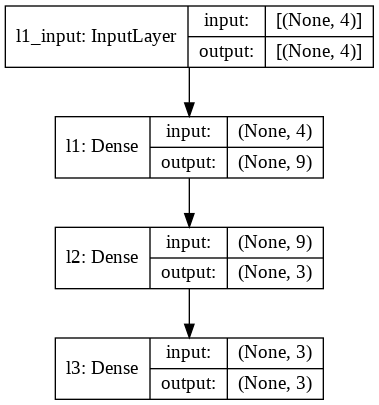

In [6]:
import keras
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
pip install keras_sequential_ascii


  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-cp36-none-any.whl size=3063 sha256=7aaf9e34c6d0f009744f8c2e853f3576d8b84444876b2aaaf792244650d2a773
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [11]:
# (ii) Draw the schematic diagram of the NN 2 along with all the weights and specify suitable activation function
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------        45    51.7%
                relu   #####           9
               Dense   XXXXX -------------------        30    34.5%
                relu   #####           3
               Dense   XXXXX -------------------        12    13.8%
             softmax   #####           3


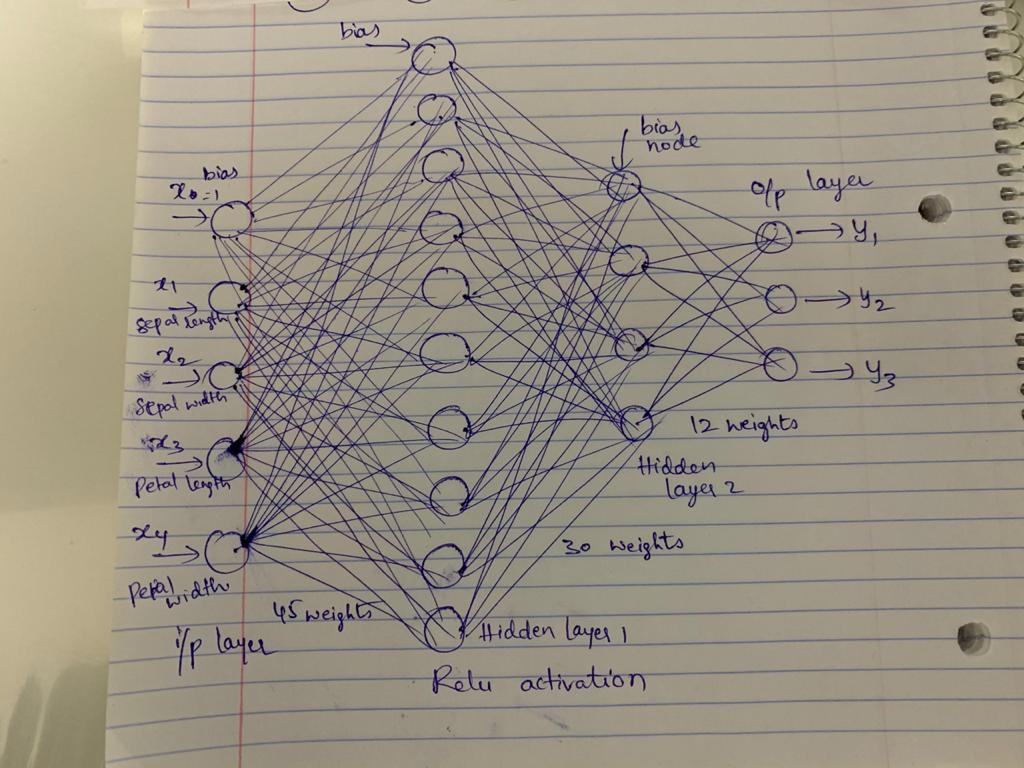

In [17]:
from IPython.display import Image
Image(filename='DeepLearning_Assignment_Q2.jpeg')